<h1 align='center' style="color: brown;">LOAN Dataset : Classification of Algorithm </h1>
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<p><b>Objective :</b> Using LOAN dataset and apply the different algorithms like SVM, Logistics Regression, Decision tree, KNN, and find the best one for this specific dataset by accuracy evaluation methods.</p>

<hr>
<h2 align='center' style="color: blue;">Loading Libraries</h2>
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

<hr>
<h2 align='center' style="color: blue;">Loading Data and Features</h2>
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

In [2]:
# setting the random seed for similar results on each run
np.random.seed(7)

In [3]:
df = pd.read_csv('loan_train.csv')

In [4]:
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,09-08-2016,10-07-2016,45,High School or Below,male
1,PAIDOFF,1000,30,09-08-2016,10-07-2016,33,Bechalor,female
2,PAIDOFF,1000,15,09-08-2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,09-09-2016,10-08-2016,28,college,female
4,PAIDOFF,1000,30,09-09-2016,10-08-2016,29,college,male
...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,09-11-2016,9/25/2016,32,High School or Below,male
342,COLLECTION,1000,30,09-11-2016,10-10-2016,25,High School or Below,male
343,COLLECTION,800,15,09-12-2016,9/26/2016,39,college,male
344,COLLECTION,1000,30,09-12-2016,11-10-2016,28,college,male


In [5]:
df.head(10)

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,09-08-2016,10-07-2016,45,High School or Below,male
1,PAIDOFF,1000,30,09-08-2016,10-07-2016,33,Bechalor,female
2,PAIDOFF,1000,15,09-08-2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,09-09-2016,10-08-2016,28,college,female
4,PAIDOFF,1000,30,09-09-2016,10-08-2016,29,college,male
5,PAIDOFF,1000,30,09-09-2016,10-08-2016,36,college,male
6,PAIDOFF,1000,30,09-09-2016,10-08-2016,28,college,male
7,PAIDOFF,800,15,09-10-2016,9/24/2016,26,college,male
8,PAIDOFF,300,7,09-10-2016,9/16/2016,29,college,male
9,PAIDOFF,1000,15,09-10-2016,10-09-2016,39,High School or Below,male


In [6]:
df.shape

(346, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   loan_status     346 non-null    object
 1   Principal       346 non-null    int64 
 2   terms           346 non-null    int64 
 3   effective_date  346 non-null    object
 4   due_date        346 non-null    object
 5   age             346 non-null    int64 
 6   education       346 non-null    object
 7   Gender          346 non-null    object
dtypes: int64(3), object(5)
memory usage: 21.8+ KB


<hr>
<h2 align='center' style="color: blue;">EDA in Data</h2>
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

In [8]:
df.head(5)

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,09-08-2016,10-07-2016,45,High School or Below,male
1,PAIDOFF,1000,30,09-08-2016,10-07-2016,33,Bechalor,female
2,PAIDOFF,1000,15,09-08-2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,09-09-2016,10-08-2016,28,college,female
4,PAIDOFF,1000,30,09-09-2016,10-08-2016,29,college,male


## Convert to Date Time Object 

In [9]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


## Data Visualization and Pre-Processing

In [10]:
df.describe()

,Principal,terms,age
count,346.000000,346.000000,346.000000
mean,943.641618,22.653179,30.939306
std,109.425530,7.991006,6.039418
min,300.000000,7.000000,18.000000
25%,900.000000,15.000000,27.000000
50%,1000.000000,30.000000,30.000000
75%,1000.000000,30.000000,35.000000
max,1000.000000,30.000000,51.000000


In [11]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

**260 people have paid off the loan on time while 86 have gone into collection.**

<Axes: ylabel='loan_status'>

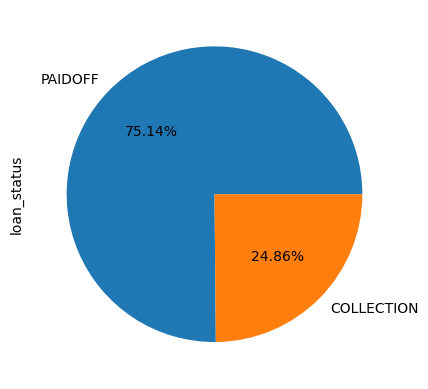

In [12]:
df["loan_status"].value_counts().plot(kind='pie', autopct="%0.2f%%")

Different Attribute Plots


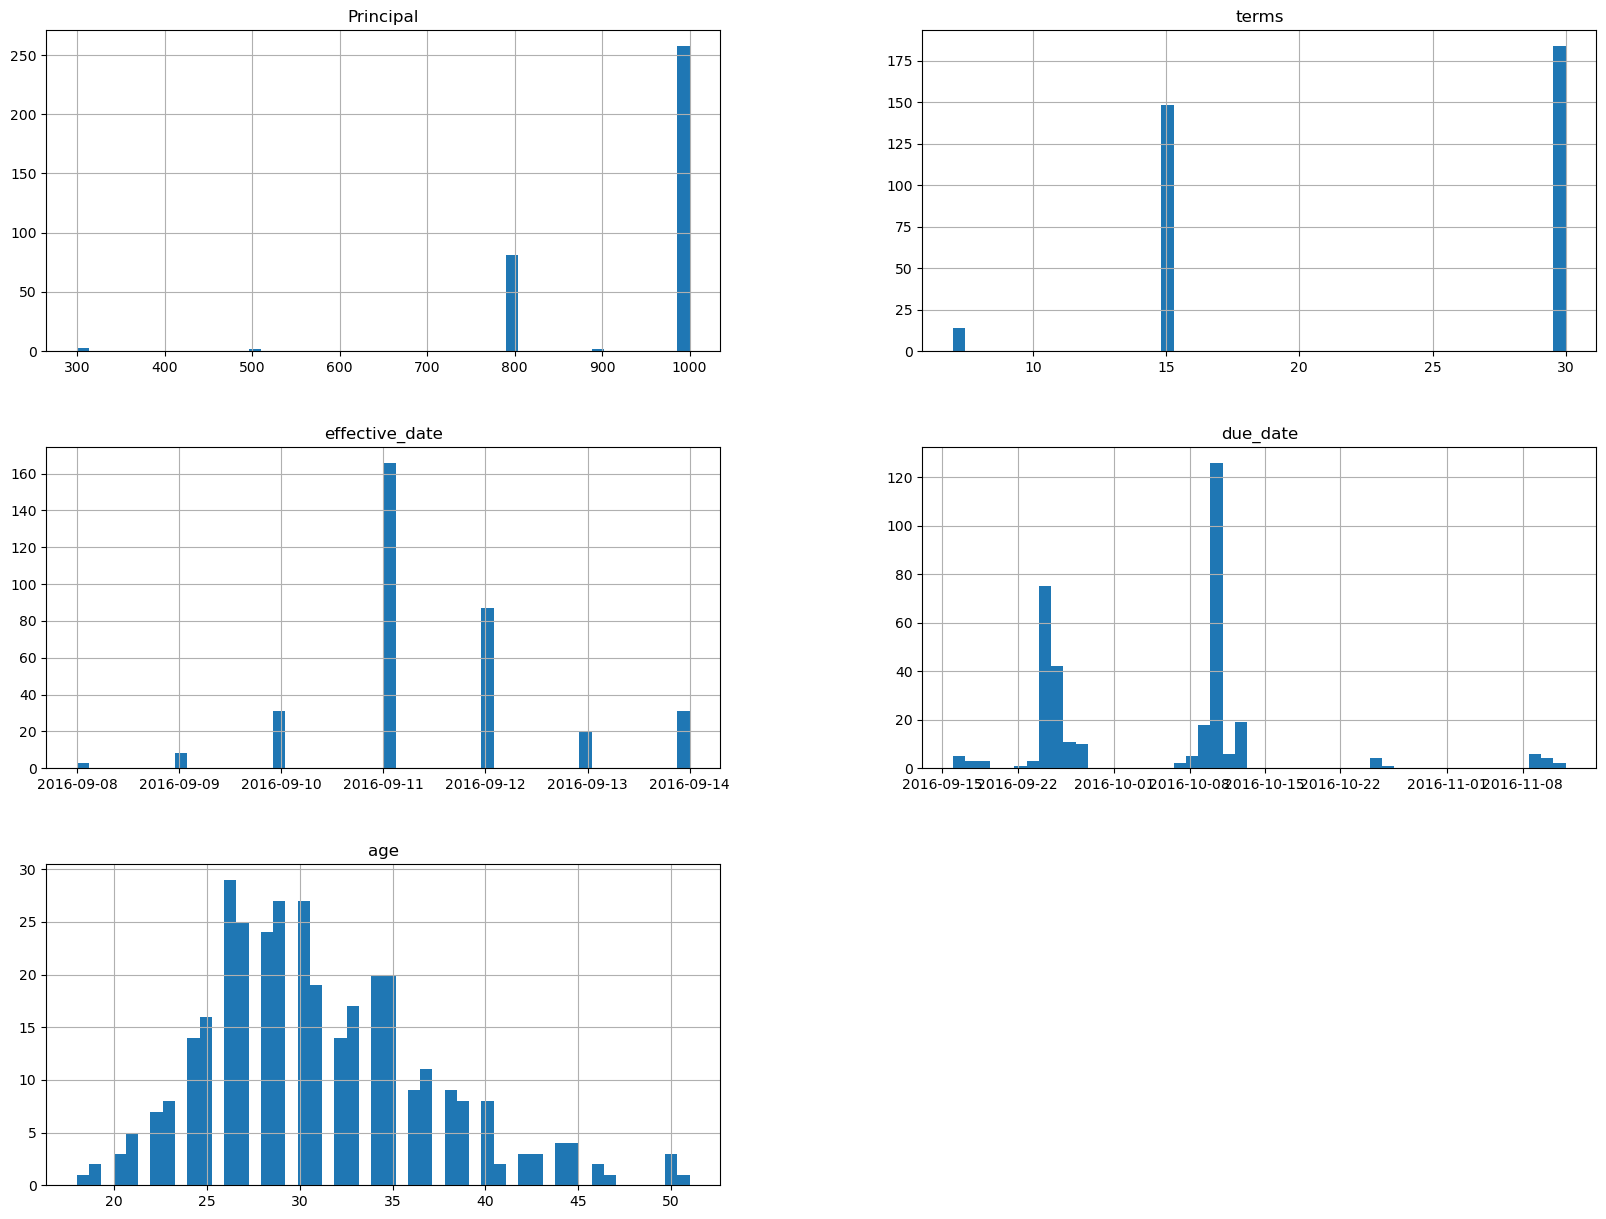

In [13]:
df.hist(bins=50, figsize=(20,15))
print("Different Attribute Plots")
plt.show()

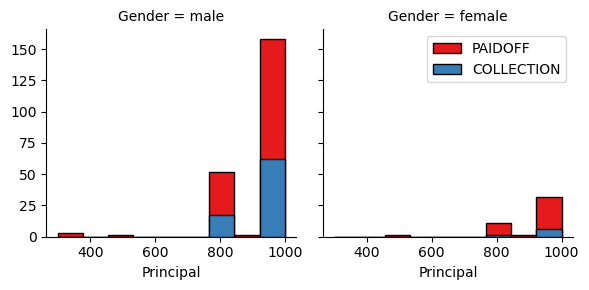

In [14]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

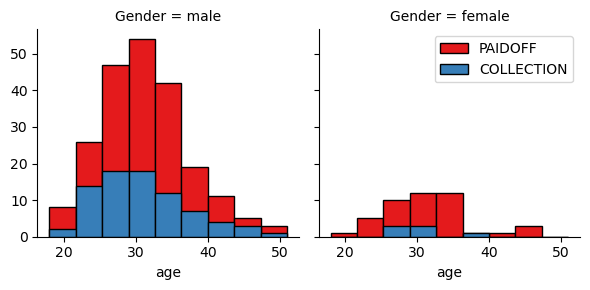

In [15]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Pre-Processing : Feature Selection/Extraction

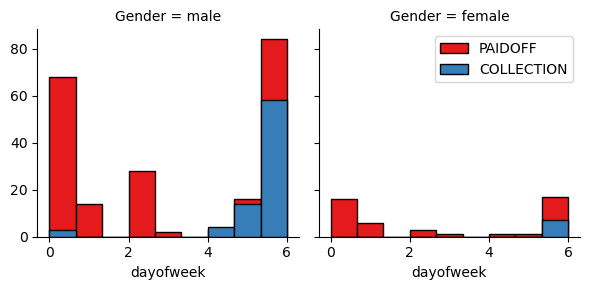

In [16]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

### Lets look at the Months people get the loan 

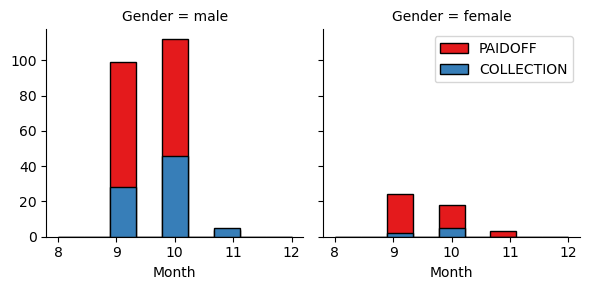

In [17]:
df['Month'] = df.due_date.dt.month
bins = np.linspace(df.Month.min()-1, df.Month.max()+1, 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Month', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

**There is higher possibility that people pay off the loan in 9th month than paying it in 10th or 11th. As the observation shows people who get the loan at the end of the week don't pay it off, so lets use Feature binarization to set a threshold values less then day 4**

In [18]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,10,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,10,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,9,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,10,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,10,1


## Convert Categorical features to Numerical values

In [19]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

**86 % of female pay there loans while only 73 % of males pay there loan**

<Axes: ylabel='loan_status'>

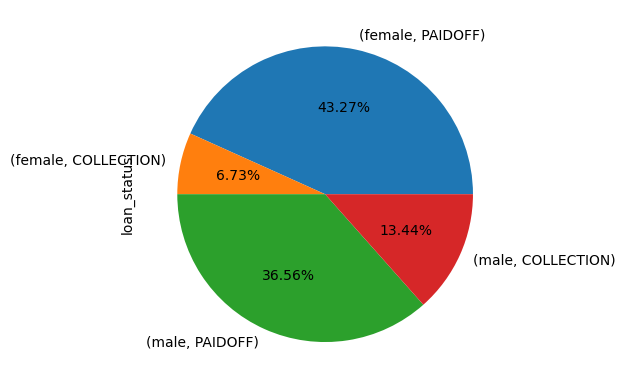

In [20]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True).plot(kind='pie', autopct="%0.2f%%")

**Convert male to 0 and female to 1**

In [21]:
# Lets convert male to 0 and female to 1
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,10,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,10,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,9,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,10,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,10,1


In [22]:
df['deadline']=df['due_date']-df['effective_date']
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month,weekend,deadline
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,10,0,29 days
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,10,0,29 days
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,9,0,14 days
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,10,1,29 days
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,10,1,29 days


In [23]:
df['deadline']=df['deadline'].dt.days
df.head(3)

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month,weekend,deadline
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,10,0,29
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,10,0,29
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,9,0,14


### Hence On the basic of above tested results columns Month and deadline doesn't improve the result, so we will not use them in feature sets of training.

### How about education?

In [24]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

**There are only two people with Master or Above degress, one of them has paid off the loan and the other one hasn't. As a result keeping 'Master or Above' in our data set wont't help much! so we drop it.**

In [25]:
len(df[df.education=='Master or Above'])

2

## One Hot Encoding  
### We use one hot encoding technique to convert categorical variables to binary variables and append them to the feature Data Frame 

In [26]:
Feature = df[['Principal','terms','age','Gender','weekend','dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,0,3,0,1,0
1,1000,30,33,1,0,3,1,0,0
2,1000,15,27,0,0,3,0,0,1
3,1000,30,28,1,1,4,0,0,1
4,1000,30,29,0,1,4,0,0,1


## Feature selection

### Our data without label

In [27]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,0,3,0,1,0
1,1000,30,33,1,0,3,1,0,0
2,1000,15,27,0,0,3,0,0,1
3,1000,30,28,1,1,4,0,0,1
4,1000,30,29,0,1,4,0,0,1


### Our labels

In [28]:
# We encode our labels as 0 and 1 s
y = df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1]).values
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

## Normalize Data 

**Data Standardization give data zero mean and unit variance**

In [29]:
X= preprocessing.StandardScaler().fit_transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.26122054, -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
        -0.26122054,  2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.26122054, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
         0.12175534, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
         0.12175534, -0.38170062, -0.87997669,  1.14984679]])

<hr>
<h2 align='center' style="color: blue;">Training and Testing of Data</h2>
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

In [30]:
# import scoring methods
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

In [31]:
# our data for training (used '_train' just for improving readability)
X_train, y_train=X,y

In [32]:
X_train.shape, y_train.shape

((346, 9), (346,))

In [33]:
# a dictionary for keeping all scores of the classifiers
trainScores={}

# K Nearest Neighbor(KNN)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

bestScore=0.0
accList=[]

for k in range(3,12):
    
    clf_knn = KNeighborsClassifier(n_neighbors=k,algorithm='auto')
    
    # using 10 fold cross validation for scoring the classifier's accuracy
    scores = cross_val_score(clf_knn, X, y, cv=10)
    score=scores.mean()
    accList.append(score)
    
    if score > bestScore:
        bestScore=score
        best_clf=clf_knn
        bestK=k
        
print("Best K is :",bestK,"| Cross validation Accuracy :",bestScore)
clf_knn=best_clf

Best K is : 8 | Cross validation Accuracy : 0.7579831932773109


### Best K is : 8
### Cross validation Accuracy : 0.7579831932773109 [ 75.79% ]

In [35]:
clf_knn.fit(X_train,y_train)
y_pred=best_clf.predict(X_train)

In [36]:
trainScores['KNN-jaccard']=jaccard_score(y_train, y_pred)
trainScores['KNN-f1-score']=f1_score(y_train, y_pred, average='weighted')  

In [37]:
trainScores

{'KNN-jaccard': 0.25252525252525254, 'KNN-f1-score': 0.7537693061220201}

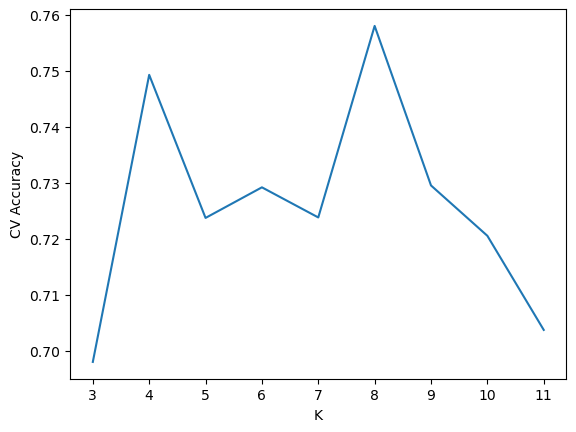

In [38]:
plt.plot(range(3,12),accList)
plt.xlabel('K')
plt.ylabel('CV Accuracy')
plt.show()

# Decision Tree

In [39]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)

y_pred=clf_tree.predict(X_train)

In [40]:
trainScores['Tree-jaccard']=jaccard_score(y_train, y_pred)
trainScores['Tree-f1-score']=f1_score(y_train, y_pred, average='weighted')  

In [41]:
trainScores

{'KNN-jaccard': 0.25252525252525254,
 'KNN-f1-score': 0.7537693061220201,
 'Tree-jaccard': 0.7222222222222222,
 'Tree-f1-score': 0.924927020820985}

# Support Vector Machine

In [42]:
y_train=y_train.astype(float)

In [43]:
from sklearn import svm

clf_svm = svm.LinearSVC(random_state=7)
clf_svm.fit(X_train, y_train)  

y_pred=clf_svm.predict(X_train)

In [44]:
trainScores['SVM-jaccard']=jaccard_score(y_train, y_pred)
trainScores['SVM-f1-score']=f1_score(y_train, y_pred, average='weighted')  

In [45]:
trainScores

{'KNN-jaccard': 0.25252525252525254,
 'KNN-f1-score': 0.7537693061220201,
 'Tree-jaccard': 0.7222222222222222,
 'Tree-f1-score': 0.924927020820985,
 'SVM-jaccard': 0.054945054945054944,
 'SVM-f1-score': 0.6689062277741139}

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial')
clf_log.fit(X_train, y_train)

y_pred=clf_log.predict(X_train)
y_proba=clf_log.predict_proba(X_train)

In [47]:
# testScores['LogReg-logLoss']=log_loss(testy, proba)
trainScores['LogReg-jaccard']=jaccard_score(y_train, y_pred)
trainScores['LogReg-f1-score']=f1_score(y_train, y_pred, average='weighted')  
trainScores['LogReg-logLoss']=log_loss(y_train, y_proba)

In [48]:
trainScores

{'KNN-jaccard': 0.25252525252525254,
 'KNN-f1-score': 0.7537693061220201,
 'Tree-jaccard': 0.7222222222222222,
 'Tree-f1-score': 0.924927020820985,
 'SVM-jaccard': 0.054945054945054944,
 'SVM-f1-score': 0.6689062277741139,
 'LogReg-jaccard': 0.14583333333333334,
 'LogReg-f1-score': 0.7088399037150602,
 'LogReg-logLoss': 0.43174993676801543}

# Model Evaluation using Test set

### Load Test set for evaluation 

In [49]:
test_df = pd.read_csv('loan_test.csv')

In [50]:
test_df.head(10)

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,09-08-2016,10-07-2016,50,Bechalor,female
1,PAIDOFF,300,7,09-09-2016,9/15/2016,35,Master or Above,male
2,PAIDOFF,1000,30,09-10-2016,10-09-2016,43,High School or Below,female
3,PAIDOFF,1000,30,09-10-2016,10-09-2016,26,college,male
4,PAIDOFF,800,15,09-11-2016,9/25/2016,29,Bechalor,male
5,PAIDOFF,700,15,09-11-2016,9/25/2016,33,High School or Below,male
6,PAIDOFF,1000,15,09-11-2016,9/25/2016,24,college,male
7,PAIDOFF,1000,30,09-11-2016,10-10-2016,32,Bechalor,male
8,PAIDOFF,800,15,09-11-2016,9/25/2016,27,college,female
9,PAIDOFF,1000,15,09-11-2016,9/25/2016,37,college,male


In [51]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature = test_df[['Principal','terms','age','Gender','weekend','dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

X = Feature
y = test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1]).values

testy=y.astype(float)
testX= preprocessing.StandardScaler().fit_transform(X)

In [52]:
testScores={}

In [53]:
knn_pred=clf_knn.predict(testX)
testScores['KNN-jaccard']=jaccard_score(testy, knn_pred)
testScores['KNN-f1-score']=f1_score(testy, knn_pred, average='weighted')  

In [54]:
tree_pred=clf_tree.predict(testX)
testScores['Tree-jaccard']=jaccard_score(testy, tree_pred)
testScores['Tree-f1-score']=f1_score(testy, tree_pred, average='weighted')  

In [55]:
svm_pred=clf_svm.predict(testX)
testScores['SVM-jaccard']=jaccard_score(testy, svm_pred)
testScores['SVM-f1-score']=f1_score(testy, svm_pred, average='weighted')  

In [56]:
log_pred=clf_log.predict(testX)
proba=clf_log.predict_proba(testX)
testScores['LogReg-jaccard']=jaccard_score(testy, log_pred)
testScores['LogReg-f1-score']=f1_score(testy, log_pred, average='weighted')  
testScores['LogReg-logLoss']=log_loss(testy, proba)

In [57]:
trainScores

{'KNN-jaccard': 0.25252525252525254,
 'KNN-f1-score': 0.7537693061220201,
 'Tree-jaccard': 0.7222222222222222,
 'Tree-f1-score': 0.924927020820985,
 'SVM-jaccard': 0.054945054945054944,
 'SVM-f1-score': 0.6689062277741139,
 'LogReg-jaccard': 0.14583333333333334,
 'LogReg-f1-score': 0.7088399037150602,
 'LogReg-logLoss': 0.43174993676801543}

In [58]:
testScores

{'KNN-jaccard': 0.2222222222222222,
 'KNN-f1-score': 0.7144311330357843,
 'Tree-jaccard': 0.38095238095238093,
 'Tree-f1-score': 0.7618862861115153,
 'SVM-jaccard': 0.13333333333333333,
 'SVM-f1-score': 0.6959228135698723,
 'LogReg-jaccard': 0.14285714285714285,
 'LogReg-f1-score': 0.708937198067633,
 'LogReg-logLoss': 0.4739578521073104}

In [59]:
# Features used
list(Feature.columns)

['Principal',
 'terms',
 'age',
 'Gender',
 'weekend',
 'dayofweek',
 'Bechalor',
 'High School or Below',
 'college']

<hr>
<h2 align='center' style="color: blue;">Report or Result</h2>
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86       260
         1.0       0.58      0.16      0.25        86

    accuracy                           0.76       346
   macro avg       0.68      0.56      0.56       346
weighted avg       0.73      0.76      0.71       346



## Confusion Matrix Parameter

| Feature      | Precision | Recall  | F1 Score |
|--------------|---------  |---------|----------|
|Male          | 0.78      | 0.96    |  0.86    |
|Female        | 0.58      | 0.16    |  0.25    |
|Accuracy      |    NA     |   NA    |  0.76    |
|Macro Avg     | 0.68      | 0.56    |  0.56    |
|Weighted Avg  | 0.73      | 0.76    |  0.71    |

## Accuracy Evaluation

| Algorithm           | Jaccard | F1-score | LogLoss |
|---------------------|---------|----------|---------|
| KNN                 | 0.7407  | 0.7144   |  NA     |
| Decision Tree       | 0.7592  | 0.7618   |  NA     |
| SVM                 | 0.7592  | 0.6959   |  NA     |
| Logistic Regression | 0.7777  | 0.7089   | 0.4947  |

## Conclusion
Even though `DECISION TREE` had shown a relatively good result in trainig, but it is  `LOGISTIC REGRESSION` that out-performs the other models in test. Out tree model suffers from over-fitting

                                       ********************* END **********************